In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import seaborn as sns




In [132]:
data=pd.read_csv("/Users/muhammedyusufaker/Downloads/dizi_verisi_95_23.xlsx - Sayfa1 (1) - dizi_verisi_95_23.xlsx - Sayfa1 (1).csv")


In [133]:
data.head()

,Dizi Adı English,Referans,Başlama Yılı,Bitiş Yılı,Referans-Ortalama Süre,Ortalama Süre,Tür-1,Tür-2,Tür-3,Bölüm Sayısı,...,Senarist-3,Senarist-4,Senarist-5,Yapımcı-1,Yapımcı-2,Yapımcı-3,Müzisyen-1,Müzisyen-2,Müzisyen-3,Başarı Metrigi
0,Bir Demet Tiyatro,1995–2007,1995,2007,"0,75",45,Comedy,Family,NaN,156.0,...,NaN,NaN,NaN,Necati Akpinar,NaN,NaN,Grup Çagri,NaN,NaN,4
1,Reyting Hamdi,1995–2007,1995,2007,"0,60",40,Comedy,NaN,NaN,367.0,...,Murat Boyacioglu,Mesut Ceylan,Nur Özlem Elginöz,Hamdi Alkan,Süleyman Nebioglu,NaN,Engin Özyilmaz,Erdem Özyilmaz,NaN,4
2,Çiçek taksi,1995–2003,1995,2003,"1,00",60,Comedy,Drama,NaN,367.0,...,Yilmaz Okumus,Atay Sözer,Hayal Tacirleri,Türker Inanoglu,NaN,NaN,Murat Pinar Ozdemir,Özkan Turgay,NaN,4
3,Bizim Ev,1995,1995,1998,"1,00",60,Drama,NaN,NaN,101.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,Boşgezen ve kalfası,1995,1995,1995,"0,75",45,Comedy,Fantasy,NaN,8.0,...,NaN,NaN,NaN,Ömer Sahin,NaN,NaN,NaN,NaN,NaN,1


In [134]:
data.tail()

,Dizi Adı English,Referans,Başlama Yılı,Bitiş Yılı,Referans-Ortalama Süre,Ortalama Süre,Tür-1,Tür-2,Tür-3,Bölüm Sayısı,...,Senarist-3,Senarist-4,Senarist-5,Yapımcı-1,Yapımcı-2,Yapımcı-3,Müzisyen-1,Müzisyen-2,Müzisyen-3,Başarı Metrigi
702,Kirli Sepeti,2023–,2023,2023,"1,00",60,Comedy,Drama,NaN,11.0,...,Sertaç Sayin,Nermin Yildirim,NaN,Fatih Aksoy,Merve Girgin,Direnç Aksoy Sidar,Aytaç Özgümüs,Sertaç Özgümüs,NaN,1
703,Ömer,2023–,2023,2023,"2,00",120,Drama,NaN,NaN,37.0,...,Yehonatan Indursky,Vural Yasaroglu,Sedef Bayburtluoglu,Onur Güvenatam,Oguzhan Sakaoglu,Aysil Tay,Alp Yenier,NaN,NaN,2
704,Magarsus,2023–,2023,2023,"1,00",60,Drama,NaN,NaN,9.0,...,NaN,NaN,NaN,Serkan Cakarer,Yamac Okur,Baris Yildirim,Toygar Isikli,NaN,NaN,2
705,Tozkoparan Iskender Gölge,2023–,2023,2023,"1,00",60,Sci-Fi,NaN,NaN,11.0,...,NaN,NaN,NaN,Ferhat Ayan,NaN,NaN,Ömer Faruk Berker,Burcu Memisoglu,Serkan Semiz,3
706,Ruhun Duymaz,2023,2023,2023,"2,00",120,Comedy,Drama,NaN,9.0,...,Cem Görgeç,Ayse Kutlu,Ayse Kutlu,Saner Ayar,Omer Lekesiz,NaN,Recby Saatçi,Ercan Saatçi,Ilker Yeter,1


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Dizi Adı English        707 non-null    object 
 1   Referans                707 non-null    object 
 2   Başlama Yılı            707 non-null    int64  
 3   Bitiş Yılı              707 non-null    int64  
 4   Referans-Ortalama Süre  705 non-null    object 
 5   Ortalama Süre           707 non-null    int64  
 6   Tür-1                   707 non-null    object 
 7   Tür-2                   392 non-null    object 
 8   Tür-3                   200 non-null    object 
 9   Bölüm Sayısı            706 non-null    float64
 10  Sezon Sayısı            706 non-null    float64
 11  Oyuncu-1                705 non-null    object 
 12  Oyuncu-2                703 non-null    object 
 13  Oyuncu-3                703 non-null    object 
 14  Oyuncu-4                701 non-null    ob

In [136]:
data.shape

(707, 38)

In [137]:
data=data.drop(['İhraç Edildi Mi?'],axis=1)

In [138]:
data.head()

,Dizi Adı English,Referans,Başlama Yılı,Bitiş Yılı,Referans-Ortalama Süre,Ortalama Süre,Tür-1,Tür-2,Tür-3,Bölüm Sayısı,...,Senarist-3,Senarist-4,Senarist-5,Yapımcı-1,Yapımcı-2,Yapımcı-3,Müzisyen-1,Müzisyen-2,Müzisyen-3,Başarı Metrigi
0,Bir Demet Tiyatro,1995–2007,1995,2007,"0,75",45,Comedy,Family,NaN,156.0,...,NaN,NaN,NaN,Necati Akpinar,NaN,NaN,Grup Çagri,NaN,NaN,4
1,Reyting Hamdi,1995–2007,1995,2007,"0,60",40,Comedy,NaN,NaN,367.0,...,Murat Boyacioglu,Mesut Ceylan,Nur Özlem Elginöz,Hamdi Alkan,Süleyman Nebioglu,NaN,Engin Özyilmaz,Erdem Özyilmaz,NaN,4
2,Çiçek taksi,1995–2003,1995,2003,"1,00",60,Comedy,Drama,NaN,367.0,...,Yilmaz Okumus,Atay Sözer,Hayal Tacirleri,Türker Inanoglu,NaN,NaN,Murat Pinar Ozdemir,Özkan Turgay,NaN,4
3,Bizim Ev,1995,1995,1998,"1,00",60,Drama,NaN,NaN,101.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,Boşgezen ve kalfası,1995,1995,1995,"0,75",45,Comedy,Fantasy,NaN,8.0,...,NaN,NaN,NaN,Ömer Sahin,NaN,NaN,NaN,NaN,NaN,1


In [139]:
valuecont=data['Başarı Metrigi'].value_counts()

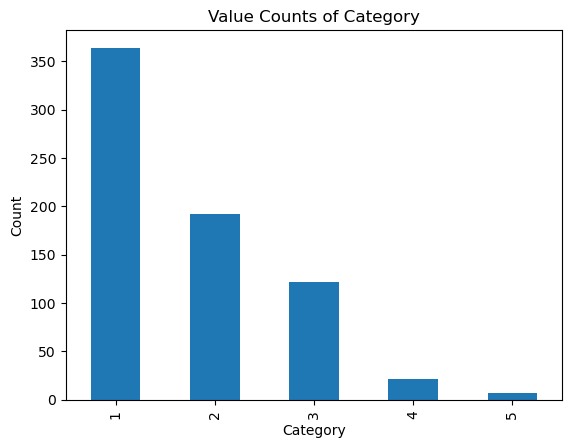

In [140]:
valuecont.plot(kind="bar", xlabel="Category", ylabel="Count", legend=False)
plt.title("Value Counts of Category")
plt.show()

In [141]:
data['Ortalama Süre']=data['Ortalama Süre'].astype(int)

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Dizi Adı English        707 non-null    object 
 1   Referans                707 non-null    object 
 2   Başlama Yılı            707 non-null    int64  
 3   Bitiş Yılı              707 non-null    int64  
 4   Referans-Ortalama Süre  705 non-null    object 
 5   Ortalama Süre           707 non-null    int64  
 6   Tür-1                   707 non-null    object 
 7   Tür-2                   392 non-null    object 
 8   Tür-3                   200 non-null    object 
 9   Bölüm Sayısı            706 non-null    float64
 10  Sezon Sayısı            706 non-null    float64
 11  Oyuncu-1                705 non-null    object 
 12  Oyuncu-2                703 non-null    object 
 13  Oyuncu-3                703 non-null    object 
 14  Oyuncu-4                701 non-null    ob

In [143]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Tür-1'] = label_encoder.fit_transform(data['Tür-1'])

In [144]:
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(class_mapping)

{'Action': 0, 'Adventure': 1, 'Animation': 2, 'Biography': 3, 'Comedy': 4, 'Crime': 5, 'Drama': 6, 'Family': 7, 'Fantasy': 8, 'History': 9, 'Income': 10, 'Musical': 11, 'Romance': 12, 'Sci-Fi': 13, 'Short': 14}


In [145]:
np.random.seed(42)
corr_data=pd.DataFrame({'Başlama Yılı':np.random.rand(5),'Başarı Metrigi':np.random.rand(5),'Bitiş Yılı':np.random.rand(5),'Ortalama Süre':np.random.rand(5),'Bölüm Sayısı':np.random.rand(5),'Sezon Sayısı':np.random.rand(5),'Tür-1':np.random.rand(5)})
corr_matrix3=data.corr()['Başarı Metrigi']

/var/folders/d_/7gg2_hdj38lfwqnh334c8zzh0000gn/T/ipykernel_21481/461580887.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix3=data.corr()['Başarı Metrigi']


In [146]:
print(corr_matrix3)

Başlama Yılı     -0.123323
Bitiş Yılı        0.065345
Ortalama Süre    -0.101613
Tür-1            -0.109694
Bölüm Sayısı      0.569227
Sezon Sayısı      0.703614
Başarı Metrigi    1.000000
Name: Başarı Metrigi, dtype: float64


/var/folders/d_/7gg2_hdj38lfwqnh334c8zzh0000gn/T/ipykernel_21481/1285035660.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,fmt=".1f",linewidths=.7)


<function matplotlib.pyplot.show(close=None, block=None)>

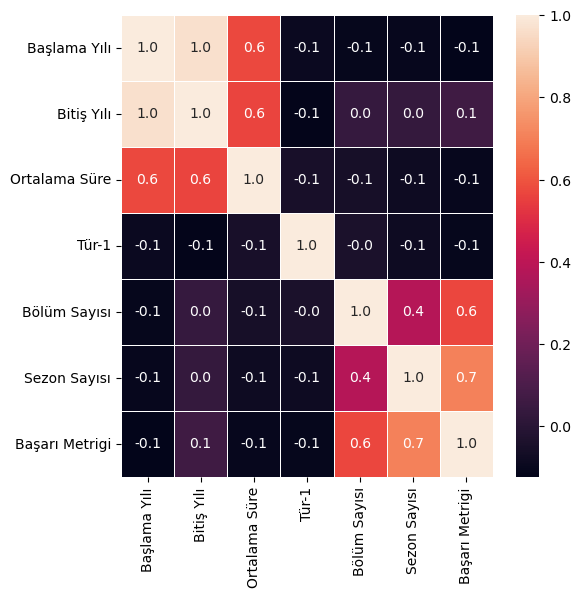

In [147]:
plt.figure(figsize=(6,6))
sns.heatmap(data.corr(),annot=True,fmt=".1f",linewidths=.7)
plt.show

In [148]:
data.head()

,Dizi Adı English,Referans,Başlama Yılı,Bitiş Yılı,Referans-Ortalama Süre,Ortalama Süre,Tür-1,Tür-2,Tür-3,Bölüm Sayısı,...,Senarist-3,Senarist-4,Senarist-5,Yapımcı-1,Yapımcı-2,Yapımcı-3,Müzisyen-1,Müzisyen-2,Müzisyen-3,Başarı Metrigi
0,Bir Demet Tiyatro,1995–2007,1995,2007,"0,75",45,4,Family,NaN,156.0,...,NaN,NaN,NaN,Necati Akpinar,NaN,NaN,Grup Çagri,NaN,NaN,4
1,Reyting Hamdi,1995–2007,1995,2007,"0,60",40,4,NaN,NaN,367.0,...,Murat Boyacioglu,Mesut Ceylan,Nur Özlem Elginöz,Hamdi Alkan,Süleyman Nebioglu,NaN,Engin Özyilmaz,Erdem Özyilmaz,NaN,4
2,Çiçek taksi,1995–2003,1995,2003,"1,00",60,4,Drama,NaN,367.0,...,Yilmaz Okumus,Atay Sözer,Hayal Tacirleri,Türker Inanoglu,NaN,NaN,Murat Pinar Ozdemir,Özkan Turgay,NaN,4
3,Bizim Ev,1995,1995,1998,"1,00",60,6,NaN,NaN,101.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,Boşgezen ve kalfası,1995,1995,1995,"0,75",45,4,Fantasy,NaN,8.0,...,NaN,NaN,NaN,Ömer Sahin,NaN,NaN,NaN,NaN,NaN,1


In [152]:
droplist=['Referans','Referans-Ortalama Süre','Tür-2','Tür-3','Oyuncu-1','Oyuncu-2','Oyuncu-3','Oyuncu-4','Oyuncu-5','Oyuncu-6','Oyuncu-7','Oyuncu-8','Oyuncu-9','Oyuncu-10','Yapımcı Şirket','Yayıncı Kuruluşlar-1','Yayıncı Kuruluşlar-2','Yönetmen','Senarist-1','Senarist-2','Senarist-3','Senarist-4','Senarist-5','Yapımcı-1','Yapımcı-2','Yapımcı-3','Müzisyen-1','Müzisyen-2']

In [153]:

data=data.drop(droplist,axis=1)
data.head()

,Dizi Adı English,Başlama Yılı,Bitiş Yılı,Ortalama Süre,Tür-1,Bölüm Sayısı,Sezon Sayısı,Başarı Metrigi
0,Bir Demet Tiyatro,1995,2007,45,4,156.0,8.0,4
1,Reyting Hamdi,1995,2007,40,4,367.0,9.0,4
2,Çiçek taksi,1995,2003,60,4,367.0,7.0,4
3,Bizim Ev,1995,1998,60,6,101.0,3.0,3
4,Boşgezen ve kalfası,1995,1995,45,4,8.0,1.0,1


In [154]:
data1.head()

,Başlama Yılı,Başarı Metrigi,Bitiş Yılı,Ortalama Süre,Bölüm Sayısı,Sezon Sayısı,Tür-1
0,0.374540,0.155995,0.020584,0.183405,0.611853,0.785176,0.607545
1,0.950714,0.058084,0.969910,0.304242,0.139494,0.199674,0.170524
2,0.731994,0.866176,0.832443,0.524756,0.292145,0.514234,0.065052
3,0.598658,0.601115,0.212339,0.431945,0.366362,0.592415,0.948886
4,0.156019,0.708073,0.181825,0.291229,0.456070,0.046450,0.965632


In [160]:
data.isnull().values.any()

True

In [161]:
data.isnull().sum()

Dizi Adı English    0
Başlama Yılı        0
Bitiş Yılı          0
Ortalama Süre       0
Tür-1               0
Bölüm Sayısı        1
Sezon Sayısı        1
Başarı Metrigi      0
dtype: int64

In [162]:
mean_value = data['Bölüm Sayısı'].mean()

data['Bölüm Sayısı'] = data['Bölüm Sayısı'].fillna(mean_value)


In [163]:
data.isnull().sum()

Dizi Adı English    0
Başlama Yılı        0
Bitiş Yılı          0
Ortalama Süre       0
Tür-1               0
Bölüm Sayısı        0
Sezon Sayısı        1
Başarı Metrigi      0
dtype: int64

In [164]:
mean_value1 = data['Sezon Sayısı'].mean()

data['Sezon Sayısı'] = data['Sezon Sayısı'].fillna(mean_value1)
data.isnull().sum()

Dizi Adı English    0
Başlama Yılı        0
Bitiş Yılı          0
Ortalama Süre       0
Tür-1               0
Bölüm Sayısı        0
Sezon Sayısı        0
Başarı Metrigi      0
dtype: int64

In [182]:
data_wo_names=data.drop('Dizi Adı English',axis=1)

,Başlama Yılı,Bitiş Yılı,Ortalama Süre,Tür-1,Bölüm Sayısı,Sezon Sayısı,Başarı Metrigi
0,1995,2007,45,4,156.0,8.0,4
1,1995,2007,40,4,367.0,9.0,4
2,1995,2003,60,4,367.0,7.0,4
3,1995,1998,60,6,101.0,3.0,3
4,1995,1995,45,4,8.0,1.0,1


In [187]:
x=data_wo_names[['Başlama Yılı','Bitiş Yılı','Ortalama Süre','Bölüm Sayısı','Sezon Sayısı','Tür-1','Başarı Metrigi']].values
y=data_wo_names[['Başarı Metrigi']].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [166]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(random_state=42,solver="liblinear",C=1.6,penalty="l1")
lr_model.fit(X_train,y_train)
y_head_lr=lr_model.predict(X_test)
lr_score=lr_model.score(X_test,y_test)

/Users/muhammedyusufaker/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/muhammedyusufaker/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [167]:
print(lr_score)

0.8661971830985915


In [174]:
from sklearn.tree import DecisionTreeClassifier
dc_model=DecisionTreeClassifier(random_state=42)
dc_model.fit(X_train,y_train)
y_head_dc=dc_model.predict(X_test)
dc_score=dc_model.score(X_test,y_test)

In [169]:
print(dc_score)

1.0


In [175]:
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier()
rfc_model.fit(X_train,y_train)
y_head_rfc=rfc_model.predict(X_test)
rfc_score=rfc_model.score(X_test,y_test)
print(rfc_score)

0.9788732394366197


/var/folders/d_/7gg2_hdj38lfwqnh334c8zzh0000gn/T/ipykernel_21481/3085786388.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train,y_train)


In [188]:
#KNN modelinin çalıştırılması
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=4,weights="distance")

knn_model.fit(X_train,y_train)

y_head_knn = knn_model.predict(X_test)

knn_score = knn_model.score(X_test,y_test)
print(knn_score)

0.6901408450704225


/Users/muhammedyusufaker/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [177]:
from sklearn.svm import SVC
svm_model = SVC()

svm_model.fit(X_train,y_train)

y_head_svm = svm_model.predict(X_test)

svm_score = svm_model.score(X_test,y_test)
print(svm_score)

0.528169014084507


/Users/muhammedyusufaker/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [202]:
new_data=pd.DataFrame({'Başlama Yılı':[2023,2019,2020],'Bitiş Yılı':[2023,2023,2020],'Ortalama Süre':[120,70,90],'Tür-1':[6,6,5],'Bölüm Sayısı':[9,100,30],'Sezon Sayısı':[15,1,2],'Başarı Metrigi':[5,1,3]})
predictions = knn_model.predict(new_data)
print(predictions)


[1 4 1]


/Users/muhammedyusufaker/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
